# Graded Lab Assignment 2: Evaluate classifiers (10 points)
 
In this assignment you will optimize and compare the perfomance of a parametric (logistic regression) and non-parametric (k-nearest neighbours) classifier on the MNIST dataset.

Publish your notebook (ipynb file) to your Machine Learning repository on Github ON TIME. We will check the last commit on the day of the deadline.  

### Deadline Friday, November 17, 23:59.

This notebook consists of three parts: design, implementation, results & analysis. 
We provide you with the design of the experiment and you have to implement it and analyse the results.

### Criteria used for grading
* Explain and analyse all results.
* Make your notebook easy to read. When you are finished take your time to review it!
* You do not want to repeat the same chunks of code multiply times. If your need to do so, write a function. 
* The implementation part of this assignment needs careful design before you start coding. You could start by writing pseudocode.
* In this exercise the insights are important. Do not hide them somewhere in the comments in the implementation, but put them in the Analysis part
* Take care that all the figures and tables are well labeled and numbered so that you can easily refer to them.
* A plot should have a title and axes labels.
* You may find that not everything is 100% specified in this assignment. That is correct! Like in real life you probably have to make some choices. Motivate your choices.


### Grading points distribution

* Implementation 5 points
* Results and analysis 5 points

## Design of the experiment

You do not have to keep the order of this design and are allowed to alter it if you are confident.
* Import all necessary modules. Try to use as much of the available functions as possible. 
* Use the provided train and test set of MNIST dataset.
* Pre-process data eg. normalize/standardize, reformat, etc.           
  Do whatever you think is necessary and motivate your choices.
* (1) Train logistic regression and k-nn using default settings.
* Use 10-fold cross validation for each classifier to optimize the performance for one parameter: 
    * consult the documentation on how cross validation works in sklearn (important functions:             cross_val_score(), GridSearchCV()).
    * Optimize k for k-nn,
    * for logistic regression focus on the regularization parameter,
* (2) Train logistic regression and k-nn using optimized parameters.
* Show performance on the cross-validation set for (1) and (2) for both classifiers: 
    * report the average cross validation error rates (alternatively, the average accuracies - it's up to you) and standard deviation,
    * plot the average cross valildation errors (or accuracies) for different values of the parameter that you tuned. 

* Compare performance on the test set for two classifiers:
    * produce the classification report for both classifiers, consisting of precision, recall, f1-score. Explain and analyse the results.
    * print confusion matrix for both classifiers and compare whether they missclassify the same  classes. Explain and analyse the results.
* Discuss your results.
* BONUS: only continue with this part if you are confident that your implemention is complete 
    * tune more parameters of logistic regression
    * add additional classifiers (NN, Naive Bayes, decision tree), 
    * analyse additional dataset (ex. Iris dataset)

## Implementation of the experiment

In [232]:
%pylab inline

from sklearn.datasets import load_digits
from sklearn.datasets import load_iris               # Data used in BONUS exercise
from sklearn.preprocessing import StandardScaler     # to normalize data
from sklearn.model_selection import train_test_split # to split in train and test set
from sklearn.model_selection import cross_val_score  # for 10-fold cross validation
from sklearn.linear_model import LogisticRegression  # logistic regression classifier
from sklearn.neighbors import KNeighborsClassifier   # knn classifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, f1_score, precision_recall_curve

# MNIST DATASET
digits = load_digits()
X = reshape(digits.images,(1797,64))                   #needed for cross validation                    
X_train_mnist = reshape(digits.images[:1500],(1500,64))  
X_test_mnist = reshape(digits.images[1500:],(297,64))
y = digits.target                                      #needed for cross validation
y_train_mnist = digits.target[:1500]
y_test_mnist = digits.target[1500:]            

#SCALING OF MNIST DATASET
    # Perform standardization by centering and scaling on X dataset(normalization)
scaler = StandardScaler()                                
scaler.fit(X_train_mnist)
scaler.fit(X_test_mnist)
X_train_scaled_mnist = scaler.transform(X_train_mnist) #scaled training set
X_test_scaled_mnist = scaler.transform(X_test_mnist)   #scaled test set

#IRIS DATASET (BONUS)
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
scaler.fit(X_iris)  #scaling of data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.33)

# 10-FOLD CROSS VALIDATION
def cv_10f(model, m):
    if m==0:
        model = model.fit(X_train_scaled_mnist, y_train_mnist) #fit model to scaled training data
        score = cross_val_score(model, X, y, cv=10)            #calculate accuracy for each cross validation 
    if m==1: #bonus for iris set
        model = model.fit(X_train_iris, y_train_iris)
        score = cross_val_score(model, X_iris, y_iris, cv=10)
    average_score = average(score)                         #average of the 10 cross validation accuracies
    st_dev = score.std(axis=0)                             #standard deviation of 10-fold cross validation
    cv10 = [score, average_score, st_dev]                  #stores values, so you do as few calculations as possible
    return cv10  

lr = LogisticRegression()
lrcv10 = cv_10f(lr, 0)
knn = KNeighborsClassifier()
knncv10 = cv_10f(knn, 0)

#OPTIMIZATION OF K
k_list = []                                      #initialize the values of k
start = 1
end = 30
K = range(start,end) #range of k's we want to test for optimalization    
# Do 10-fold cv for all k's in the range
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)  #initiate function with new parameter k
    k_list.append(cv_10f(knn,0)[1])                #save average 10-fold cv value for that k
optk = start+(k_list.index(max(k_list)))         #calculate optimal k

#OPTIMIZATION OF LAMBDA - REGULARIZATION
    #NOTE !! - C is the inverse of lambda (so this needs to be adapted later)
l_list = []                                      #initialize the values of C
start = 0.01
end = 0.3
steps = 30
L = np.linspace(start, end, num=steps) #range of C's we want to test for optimalization 
# Do 10-fold cv for all C's in the range
for l in L:
    lr = LogisticRegression(C = l)               #initiate function with new parameter C
    l_list.append(cv_10f(lr,0)[1])                 #save average 10-fold cv value for that C
stepsize = (end-start)/steps                     #calculates the stepsize in the range
optC = 0.01+(l_list.index(max(l_list)))*stepsize #calculate optimal C

#OPTIMIZED FUNCTIONS
#Logistic Regression with optimal C
optimized_lr = LogisticRegression(C = optC)              #optimized function for linear regression
opt_lrcv10 = cv_10f(optimized_lr,0)                        #optimized 10-fold cross validation
#Nearest Neighbors Classification with optimal k
optimized_knn = KNeighborsClassifier(n_neighbors = optk) #optimized function for k nearest neighbors
opt_knncv10 = cv_10f(optimized_knn,0)                      #optimized 10-fold cross validation

#CLASSIFICATION REPORTS
target_names = [str(digit) for digit in range(0,10)]  #class labels (digits)
#predict labels with the optimized function
lry_predict = optimized_lr.fit(X_test_scaled_mnist, y_test_mnist).predict(X_test_scaled_mnist) #Logistic Regression with C = 0.0486666
knny_predict = optimized_knn.fit(X_test_scaled_mnist, y_test_mnist).predict(X_test_scaled_mnist) #Nearest Neighbors Classification with k = 3

#CONFUSION MATRIX
lr_cm = confusion_matrix(y_test_mnist, lry_predict)   #linear regression confusion matrix
knn_cm = confusion_matrix(y_test_mnist, knny_predict) #nearest neighbors confusion matrix

Populating the interactive namespace from numpy and matplotlib


## Results and analysis of the experiment

## 1. Training with default settings
##### Initiation
This is necessary in order to make the algorithms perform better. The data will now have it's value in a certain range in contrary to a dataset where the values range from -100 to 10000000

##### 10-Fold Cross Validation
The main cv_10f function performs 10-Fold cross validation on a given machine learning model. It then stores the values of each cross validation, the average and the standard deviation in a list, for later use. This way it will only be necessary to run the cross validation in this function once per application, which saves time.

## 2. Training with optimalized parameters
### 10-Fold Cross Validation

##### Optimization of k

The highest accuracy rate: 0.97778921138 is achieved with k = 3


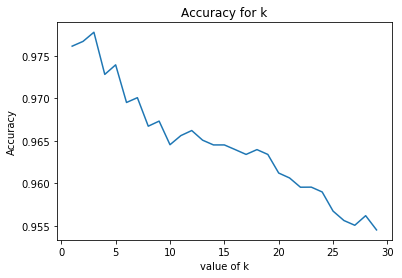

In [233]:
#plot the accuracy values for differen k values
plt.title("Accuracy for k")
plt.ylabel("Accuracy")
plt.xlabel("value of k")
plt.plot(K,k_list)

#Report the highest accuracy and it's corresponding optimal value of k
print("The highest accuracy rate:",max(k_list),"is achieved with k =",optk)

##### Optimization of lambda

The highest accuracy rate: 0.941602537134 is achieved with C = 0.048666666666666664 , so lambda =  20.547945205479454


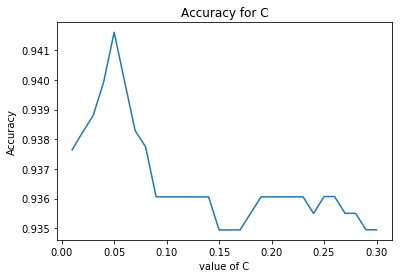

In [236]:
#plot the accuracy values for differen C values
plt.title("Accuracy for C")
plt.ylabel("Accuracy")
plt.xlabel("value of C")
plt.plot(L,l_list)

#Report the highest accuracy and it's corresponding optimal value of C
print("The highest accuracy rate:",max(l_list),"is achieved with C =",optC, ', so lambda = ',1/optC)

In [237]:
print("Logistic Regression: \n default parameters:\n   average cv:",lrcv10[1],"\n   standard deviation:",lrcv10[2],"\n function with optimized parameter C =", optC,":\n   average cv:",opt_lrcv10[1],"\n   standard deviation:",opt_lrcv10[2])
print("\nK Nearest Neighbors Classification: \n default parameters:\n   average cv:",knncv10[1],"\n   standard deviation:",knncv10[2],"\n function with optimized parameter k =", optk,":\n   average cv:",opt_knncv10[1],"\n   standard deviation:",opt_knncv10[2])

Logistic Regression: 
 default parameters:
   average cv: 0.931029834684 
   standard deviation: 0.0347846545518 
 function with optimized parameter C = 0.048666666666666664 :
   average cv: 0.941602537134 
   standard deviation: 0.0295896304236

K Nearest Neighbors Classification: 
 default parameters:
   average cv: 0.973948287255 
   standard deviation: 0.0165496015374 
 function with optimized parameter k = 3 :
   average cv: 0.97778921138 
   standard deviation: 0.0159395747319


##### Analysis
After plotting various ranges, the following ranges were kept, because they illustrate the difference best.
An attempt to create a function to go through the values for the parameters for both methods was made, however I did not succeed in this and therefore decided to keep the two seperate loops in the code for k and C.

The k nearest neighbors classification as expected performs a lot better than logistic regression on digit recognision. Digit recognision is what the nearest neighbor method is known to perform well for.

As we can see both functions perform better with the new optimized parameters. The average accuracy of the cross validation is higher for the the optimized function in both models, which means that there is more rightly classified data. 

The standard deviation of both functions also gives a nice insight. The lower the value of the standard deviation is, the closer the values of the results of each individual cross validation in the 10-Fold cross validation are. Alternatively, there is less difference between the performance of the model on various cross validation sets. This means that the model is more general and less tightly fit to the specific data it has been trained on. 
As we can see the values of the standard deviation are a lot lower for knn in general compared to linear regression. In both cases the optimized function results in a lower standard deviation than the function with default settings. In conclusion this means that we have optimized one of the parameters used in the default functions for better performance. 

Although the difference between the optimized and non optimized functions isn't huge it is definetely significant, especially if we want to apply these learning algorithms to a larger dataset.

### Classification report

In [238]:
print("Logistic Regression Classification Report:\n",classification_report(y_test_mnist, lry_predict, target_names=target_names))
print("K Nearest Neighbors Classification Report:\n", classification_report(y_test_mnist, knny_predict, target_names=target_names))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.97      0.94      0.95        31
          2       1.00      1.00      1.00        27
          3       0.97      1.00      0.98        30
          4       1.00      0.97      0.98        33
          5       0.91      1.00      0.95        30
          6       1.00      1.00      1.00        30
          7       1.00      1.00      1.00        30
          8       0.89      0.89      0.89        28
          9       0.93      0.87      0.90        31

avg / total       0.97      0.97      0.97       297

K Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.86      1.00      0.93        31
          2       1.00      1.00      1.00        27
          3       0.97      1.00      0.98        30
       

##### Analysis
The two models that were tested differ only in their precision (tp/(tp + fp)). Meaning that knn has less false positives. If you look at the first collom in the classification report, you can see that knn has 7 digit's classified with a precision of 1.00, compared to 5 for logistic regression. This means that for those 7 digits there are 0 false positives, which is a really good score.

### Confusion Matrix

In [239]:
print("Logistic Regression: \n",lr_cm)
print("K Nearest Neighbors: \n",knn_cm)

Logistic Regression: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  2]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  1  0]
 [ 0  0  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  1  0  0  0  2  0  0 25  0]
 [ 0  0  0  1  0  1  0  0  2 27]]
K Nearest Neighbors: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0]
 [ 0  1  0  0  0 27  0  0  0  2]
 [ 0  1  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  3  0  0  0  0  0  0 25  0]
 [ 0  0  0  1  0  0  0  0  0 30]]


##### Analysis
The diagonal in the confusion matrix represents the correctly classified digits, whereas the ones outside of the diagonal represent the wrongly classified digits. Linear regression has a total of 10 misclassified digits in comparisson to knn, which has only 8, this is the poorer score of the two. As was expected from the classification report above, stating that knn has less false positives. 

They both misclassify the digits 1,3 and 9 and in addition linear regression misclassified 5 and 8.

It is interesting to note that knn has a really low precision on the digit "1"(having it mislabeled as 1 "5", 1 "6" and 3 "8"'s. The only other digit that was mislabeled by knn was the "9" classified as a "5" twice. 

# Bonus

## Iris dataset

The highest accuracy rate: 0.98 is achieved with k = 12.01
The highest accuracy rate: 0.933333333333 is achieved with C = 0.48366666666666663 , so lambda =  2.067539627842867
Logistic Regression: 
 default parameters:
   average cv: 0.933333333333 
   standard deviation: 0.0516397779494 
 function with C = 0.48366666666666663 :
   average cv: 0.946666666667 
   standard deviation: 0.049888765157

K Nearest Neighbors Classification: 
 default parameters:
   average cv: 0.953333333333 
   standard deviation: 0.0426874949162 
 function with k = 12.01 :
   average cv: 0.973333333333 
   standard deviation: 0.0326598632371

Logistic Regression Classification Report:
              precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.85      0.92        20
  virginica       0.85      1.00      0.92        17

avg / total       0.95      0.94      0.94        50

K Nearest Neighbors Classification Report:
              prec

/Users/Vera/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


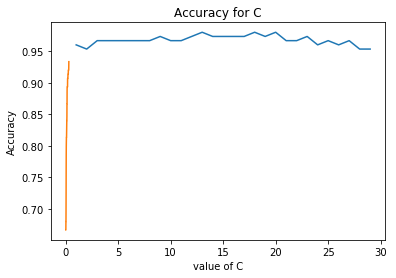

In [235]:
#DEFAULT SETTINGS
lrcv10_i = cv_10f(lr, 1)
knncv10_i = cv_10f(knn, 1)

#OPTIMIZATION OF PARAMETERS
k_list_i = []
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k)      #initiate function with new parameter k
    k_list_i.append(cv_10f(knn,1)[1])                #save average 10-fold cv value for that k
optk_i = start+(k_list_i.index(max(k_list_i)))       #calculate optimal k

l_list_i = []
start_i = 0.01
end_i = 0.3
steps_i = 50
L_i = np.linspace(start_i, end_i, num=steps_i) #range of C's we want to test for optimalization
for l in L_i:
    lr = LogisticRegression(C = l)                   #initiate function with new parameter C
    l_list_i.append(cv_10f(lr,1)[1])                 #save average 10-fold cv value for that C
stepsize_i = (end_i-start_i)/steps_i                         #calculates the stepsize in the range
optC_i = 0.01+(l_list_i.index(max(l_list_i)))*stepsize #calculate optimal C

#plot the accuracy values for differen k values
plt.title("Accuracy for k")
plt.ylabel("Accuracy")
plt.xlabel("value of k")
plt.plot(K,k_list_i)
print("The highest accuracy rate:",max(k_list_i),"is achieved with k =",optk_i) #reports optimal k

#plot the accuracy values for differen C values
plt.title("Accuracy for C")
plt.ylabel("Accuracy")
plt.xlabel("value of C")
plt.plot(L_i,l_list_i)
print("The highest accuracy rate:",max(l_list_i),"is achieved with C =",optC_i, ', so lambda = ',1/optC_i)

#OPTIMIZED FUNCTIONS
#Logistic Regression with optimal C
optimized_lr_i = LogisticRegression(C = optC_i)              #optimized function for linear regression
opt_lrcv10_i = cv_10f(optimized_lr_i,1)                        #optimized 10-fold cross validation
#Nearest Neighbors Classification with optimal k
optimized_knn_i = KNeighborsClassifier(n_neighbors = 12) #optimized function for k nearest neighbors
opt_knncv10_i = cv_10f(optimized_knn_i,1)                      #optimized 10-fold cross validation

print("Logistic Regression: \n default parameters:\n   average cv:",lrcv10_i[1],"\n   standard deviation:",lrcv10_i[2],"\n function with C =", optC_i,":\n   average cv:",opt_lrcv10_i[1],"\n   standard deviation:",opt_lrcv10_i[2])
print("\nK Nearest Neighbors Classification: \n default parameters:\n   average cv:",knncv10_i[1],"\n   standard deviation:",knncv10_i[2],"\n function with k =", optk_i,":\n   average cv:",opt_knncv10_i[1],"\n   standard deviation:",opt_knncv10_i[2])

#CLASSIFICATION REPORTS
#predict labels with the optimized function
lry_predict_i = lr.fit(X_test_iris, y_test_iris).predict(X_test_iris) #Logistic Regression with default C
knny_predict_i = knn.fit(X_test_iris, y_test_iris).predict(X_test_iris) #Nearest Neighbors Classification with default k 

#CONFUSION MATRIX
target_names_i = iris.target_names
lr_cm_i = confusion_matrix(y_test_iris, lry_predict_i)   #linear regression confusion matrix
knn_cm_i = confusion_matrix(y_test_iris, knny_predict_i) #nearest neighbors confusion matrix

print("\nLogistic Regression Classification Report:\n",classification_report(y_test_iris, lry_predict_i, target_names=target_names_i))
print("K Nearest Neighbors Classification Report:\n", classification_report(y_test_iris, knny_predict_i, target_names=target_names_i))

print("Logistic Regression: \n",lr_cm_i)
print("K Nearest Neighbors: \n",knn_cm_i)

##### Analysis

For Logistic regression the optimized function performs the best on the iris data. However, the iris data is classified best for KNN with the default settings. I tried to change various values and ranges, but in the end it didn't seem to change much. 

A possible reason for this is either that I didn't find a correct parameter, or that KNN is not a good method for this data. 

## Testing Other Learning Algorithms

The highest accuracy rate: 0.9648841766 is achieved with alpha = 0.1743333333333333


/Users/Vera/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Neural Networks: 
 default parameters:
   average cv: 0.928689421131 
   standard deviation: 0.0331923111853 
 function with optimized parameter alpha = 0.1743333333333333 :
   average cv: 0.951630015925 
   standard deviation: 0.0331581610394
Neural Networks Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       1.00      1.00      1.00        31
          2       1.00      1.00      1.00        27
          3       1.00      1.00      1.00        30
          4       1.00      1.00      1.00        33
          5       1.00      1.00      1.00        30
          6       1.00      1.00      1.00        30
          7       1.00      1.00      1.00        30
          8       1.00      1.00      1.00        28
          9       1.00      1.00      1.00        31

avg / total       1.00      1.00      1.00       297

Neural Networks: 
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0

/Users/Vera/anaconda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


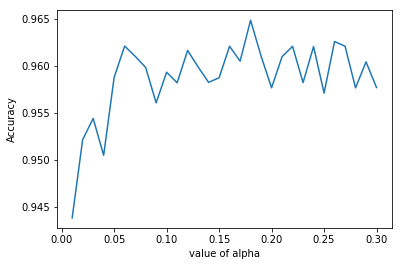

In [222]:
#add additional classifiers (NN, Naive Bayes, decision tree)
#NEURAL NETWORKS
#First we import all the modules that you need for this exrecise
from sklearn.neural_network import MLPClassifier # neural network classifier

#Step 6: Load NN Classifer
# Study in the documentation all the arguments that the function takes as input and returns as output.
# Choose some initial values to start with and experiment with them after you get to Step 8.
mlp = MLPClassifier(solver='lbfgs', max_iter=2000, activation='logistic', hidden_layer_sizes=[100])
mlpcv10 = cv_10f(mlp,0)

#OPTIMIZATION OF LAMBDA - REGULARIZATION
a_list = []                                      #initialize the values of alpha
a_start = 0.00001
a_end = 0.001
a_steps = 30
A = np.linspace(start, end, num=steps)           #range of alpha's we want to test for optimalization 

# Do 10-fold cv for all C's in the range
for a in A:
    mlp = MLPClassifier(solver='lbfgs', max_iter=2000, activation='logistic', hidden_layer_sizes=[100], alpha=a)   #initiate function with new parameter alpha
    a_list.append(cv_10f(mlp,0)[1])                 #save average 10-fold cv value for that alpha
stepsize = (end-start)/steps                      #calculates the stepsize in the range
opta = 0.01+(a_list.index(max(a_list)))*stepsize  #calculate optimal alpha

#plot the accuracy values for differen C values
plt.ylabel("Accuracy")
plt.xlabel("value of alpha")
plt.plot(A,a_list)

#Report the highest accuracy and it's corresponding optimal value of C
print("The highest accuracy rate:",max(a_list),"is achieved with alpha =",opta)


#OPTIMIZED FUNCTIONS
#Neural networks with optimal alpha

optimized_mlp = MLPClassifier(alpha=opta)              #optimized function for linear regression
opt_mlpcv10 = cv_10f(optimized_mlp,0)                        #optimized 10-fold cross validation

#CLASSIFICATION REPORT
    #predict labels with the optimized function
mlp_predict = optimized_mlp.fit(X_test_scaled_mnist, y_test_mnist).predict(X_test_scaled_mnist) #Logistic Regression with C = 0.0486666

#CONFUSION MATRIX
mlp_cm = confusion_matrix(y_test_mnist, mlp_predict)   #linear regression confusion matrix

# BONUS Step 9: Look at your cross validation error 
# and discover how to tune your NN parameters with cross validation
# Print the scores and also print the mean (accuracy) and std (95% confidence interval) of your scores
print("Neural Networks: \n default parameters:\n   average cv:",mlpcv10[1],"\n   standard deviation:",mlpcv10[2],"\n function with optimized parameter alpha =", opta,":\n   average cv:",opt_mlpcv10[1],"\n   standard deviation:",opt_mlpcv10[2])
print("Neural Networks Report:\n",classification_report(y_test_mnist, mlp_predict, target_names=target_names))
print("Neural Networks: \n",mlp_cm)

##### Analysis
The data doesn't converge which I am quite confident is because I should be testing the layers and size of the NN instead of alpha (or both). But I did not have the time to further look into this sadly.